<a href="https://colab.research.google.com/github/usUpal/traffic-sign-classification/blob/main/traffic_sign_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro
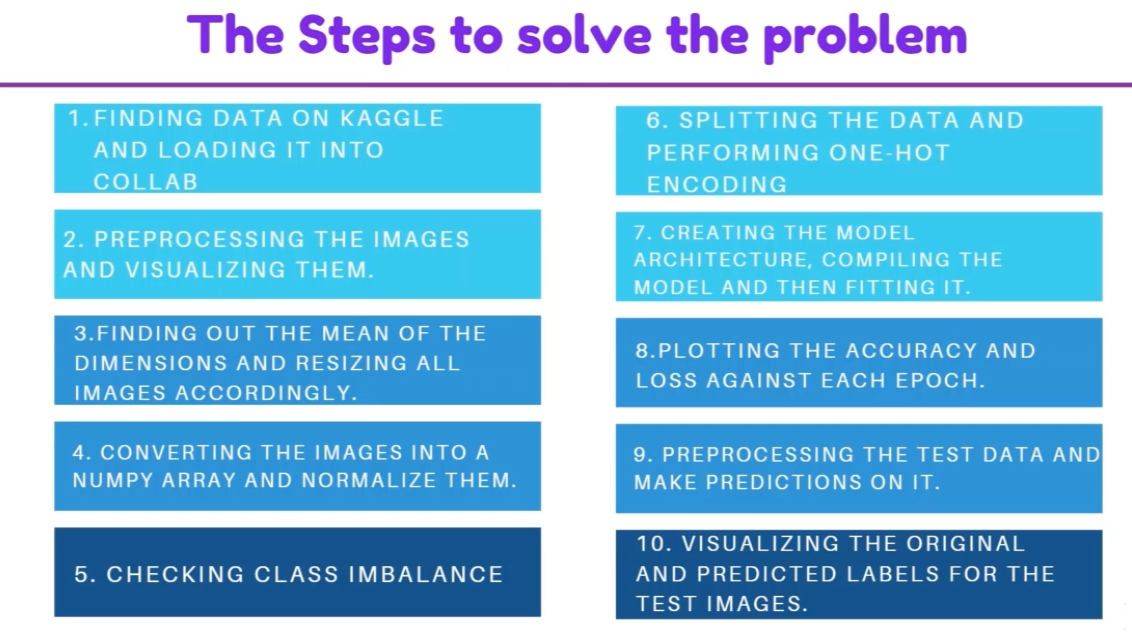

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"usupal","key":"ad6497d59271e64a7f3b118a2d7291ab"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/

# change permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!mkdir trafic_sign_dataset
%cd trafic_sign_dataset

/content/trafic_sign_dataset


In [ ]:
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          36931  
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11           6277  
eunjurho/german-traffic-sign-recognition-benchmark-cropped         german_traffic_sign_recognition_benchmark_cropped  206MB  2019-11-10 15:22:13            203  
valentynsichkar/preprocessed-light-version-of-traffic-signs        Pre-processed Light version of Traffic Signs         8GB  2021-04-10 13:35:24             10  
valentynsichkar/traffic-sign

In [ ]:
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
%cd ..

100% 611M/612M [00:04<00:00, 157MB/s]
100% 612M/612M [00:04<00:00, 143MB/s]
/content


In [ ]:
%pwd

'/content'

In [ ]:
# Unzipping downloaded file and removing unusable file
!unzip trafic_sign_dataset/gtsrb-german-traffic-sign.zip -d trafic_sign_dataset
!rm trafic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf trafic_sign_dataset/Meta
!rm -rf trafic_sign_dataset/meta
!rm -rf trafic_sign_dataset/test
!rm -rf trafic_sign_dataset/train
!rm trafic_sign_dataset/Meta.csv

Streaming output truncated to the last 5000 lines.
  inflating: trafic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: trafic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: trafic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: trafic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: trafic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: trafic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: trafic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: trafic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: trafic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: trafic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: trafic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: trafic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: trafic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: trafic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: trafic_sign_dataset/train/

# Import

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

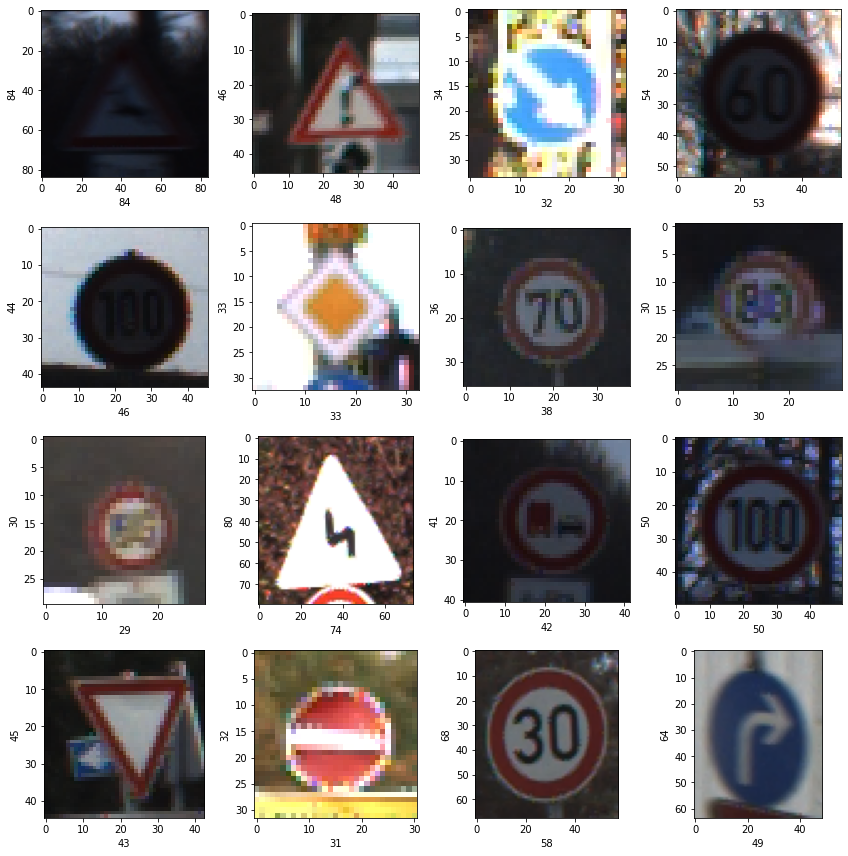

In [ ]:
# plotting 12 images to check
plt.figure(figsize=(12,12))
path = '/content/trafic_sign_dataset/Test'
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path+'/'+random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10) # width 
  plt.ylabel(rand_img.shape[0], fontsize = 10) # height

In [ ]:
# mean of image dimensions
dim1 = []
dim2 = []

for i in range(0,43):
  labels = 'trafic_sign_dataset/Train'+ '/{0}'.format(i)
  image_path = os.listdir(labels)
  for x in image_path:
    img = imread(labels + '/' + x)
    dim1.append(img.shape[0])
    dim2.append(img.shape[1])

In [ ]:
# MEAN DIMENSION
print(f'dim1 mean: {np.mean(dim1)}')
print(f'dim2 mean: {np.mean(dim2)}')

dim1 mean: 50.328929582493814
dim2 mean: 50.83587951745773


In [ ]:
# reshape the img to (50,50)
images = []
label_id = []

for i in range(43):
  labels = 'trafic_sign_dataset/Train'+ '/{0}'.format(i)
  image_path = os.listdir(labels)
  for x in image_path:
    img = Image.open(labels + '/' + x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)
    label_id.append(i)


In [ ]:
# to numpy
images = np.array(images)

images = images/255
# i = 10
# i /= 5 ///////// images /= 255 not working
# print(i)

In [ ]:
label_id = np.
label_id.shape

(39209,)

In [ ]:
images.shape

(39209, 50, 50, 3)

In [ ]:
# visualize the number of classes count
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

# split

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(images, label_id, test_size = 0.2, random_state = 42)

In [ ]:
# keras has a build in function for one hot encoding
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [ ]:
#model
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape = x_train.shape[1:], activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation = 'softmax'))


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#model.compile(loss = 'sparse_categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'])
model.summary()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0

In [ ]:

model.fit(x_train, y_train, epochs = 50, batch_size = 128, validation_data = (x_val, y_val), verbose = 2)

Epoch 1/50
246/246 - 208s - loss: 2.5561 - accuracy: 0.3184 - val_loss: 1.1767 - val_accuracy: 0.6818
Epoch 2/50
246/246 - 206s - loss: 1.1407 - accuracy: 0.6424 - val_loss: 0.5306 - val_accuracy: 0.8922
Epoch 3/50
246/246 - 207s - loss: 0.7385 - accuracy: 0.7593 - val_loss: 0.3110 - val_accuracy: 0.9350
Epoch 4/50
246/246 - 204s - loss: 0.5616 - accuracy: 0.8175 - val_loss: 0.2136 - val_accuracy: 0.9570
Epoch 5/50
246/246 - 203s - loss: 0.4728 - accuracy: 0.8462 - val_loss: 0.1570 - val_accuracy: 0.9668
Epoch 6/50
246/246 - 201s - loss: 0.3987 - accuracy: 0.8714 - val_loss: 0.1253 - val_accuracy: 0.9748
Epoch 7/50
246/246 - 200s - loss: 0.3589 - accuracy: 0.8835 - val_loss: 0.1082 - val_accuracy: 0.9774
Epoch 8/50
246/246 - 200s - loss: 0.3161 - accuracy: 0.8964 - val_loss: 0.0846 - val_accuracy: 0.9800
Epoch 9/50
246/246 - 199s - loss: 0.2853 - accuracy: 0.9066 - val_loss: 0.0744 - val_accuracy: 0.9860
Epoch 10/50
246/246 - 199s - loss: 0.2628 - accuracy: 0.9137 - val_loss: 0.0663 - 

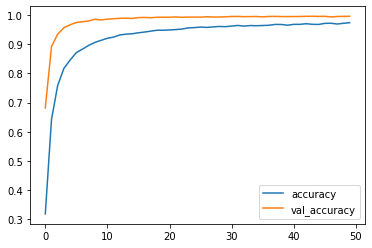

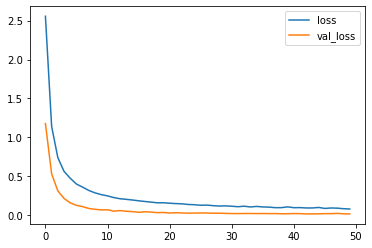

In [38]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

In [44]:
test_path = '/content/trafic_sign_dataset/Test'
!rm /content/trafic_sign_dataset/Test/GT-final_test.csv

rm: cannot remove '/content/trafic_sign_dataset/Test/GT-final_test.csv': No such file or directory


In [45]:
#defining a function that will scale images
from PIL import Image

def scaling(test_images, test_path):
    images = []

    image_path = test_images
    
    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)

    #Converting images into numpy array
    images = np.array(images)
    #The pixel value of each image ranges between 0 and 255
    #Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
    images = images/255

    return images

Next step would we creating a function to resize the test images converting them into a numpy array and normalize them.

In [46]:
test_images = scaling(sorted(os.listdir(test_path)),test_path)

Calling the above created function on test images.

In [48]:
test = pd.read_csv('/content/trafic_sign_dataset/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

Next we will read label ids from Test.csv and store the values of the class id in y_test variable.

In [51]:
#y_pred = model.predict_classes(test_images); ---> not works any more
y_pred = np.argmax(model.predict(test_images), axis=-1)

y_pred

array([16,  1, 38, ...,  6,  7, 10])

In [52]:
# Storing all lables || collected from kaggle
all_lables = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

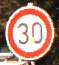

In [66]:
# Visualize test image
img = Image.open(test_path + '/00024.png')
img

In [67]:
# Original label
print("Original label : ",all_lables[y_test[1]])

Original label :  Speed limit (30km/h)


In [68]:
# Predicted label
print("Predicted label : ",all_lables[y_pred[1]])

Predicted label :  Speed limit (30km/h)
